In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import wrangle

In [8]:
df = wrangle.new_zillow_data()

In [9]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,None,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,None,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,None,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,None,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,None,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,None,None,Central,Single Family Residential,None,None


In [10]:
df = wrangle.zillow_units(df)

In [12]:
df = wrangle.null_dropper(df, .75, .75)

In [13]:
df.shape

(52289, 29)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52289 entries, 0 to 52318
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52289 non-null  int64  
 1   parcelid                      52289 non-null  int64  
 2   bathroomcnt                   52289 non-null  float64
 3   bedroomcnt                    52289 non-null  float64
 4   calculatedbathnbr             52157 non-null  float64
 5   calculatedfinishedsquarefeet  52210 non-null  float64
 6   finishedsquarefeet12          52046 non-null  float64
 7   fips                          52289 non-null  float64
 8   fullbathcnt                   52157 non-null  float64
 9   latitude                      52289 non-null  float64
 10  longitude                     52289 non-null  float64
 11  lotsizesquarefeet             51929 non-null  float64
 12  propertycountylandusecode     52289 non-null  object 
 13  p

In [15]:
# create an age feature
df['age'] = 2017 - df['yearbuilt']

df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,age
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,...,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential,19.0
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential,50.0
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential,55.0
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential,47.0
4,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,...,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential,67.0


In [16]:
# check for nulls with age
df[df['age'].isna()]

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,age
124,2546776,14190895,0.0,0.0,NaN,NaN,NaN,6059.0,NaN,33879900.0,...,432623.0,830145.0,2016.0,397522.0,9354.84,6.059022e+13,-0.001296,2017-01-03,Single Family Residential,NaN
714,722877,12281458,1.0,2.0,1.0,994.0,994.0,6037.0,1.0,33909691.0,...,59862.0,136296.0,2016.0,76434.0,2603.48,6.037542e+13,0.111950,2017-01-05,Single Family Residential,NaN
2602,496818,11696784,0.0,0.0,NaN,1378.0,1378.0,6037.0,NaN,33991632.0,...,41137.0,168828.0,2016.0,127691.0,2135.39,6.037235e+13,-0.124790,2017-06-16,Single Family Residential,NaN
3305,1580385,14197244,0.0,0.0,NaN,NaN,NaN,6059.0,NaN,33898674.0,...,384523.0,643406.0,2016.0,258883.0,7046.60,6.059022e+13,0.014172,2017-01-24,Single Family Residential,NaN
3513,338423,13850462,1.0,3.0,1.0,2030.0,NaN,6059.0,1.0,33943431.0,...,56263.0,425491.0,2016.0,369228.0,5104.70,6.059001e+13,0.026100,2017-01-25,Single Family Residential,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48475,2683968,14341510,0.0,0.0,NaN,NaN,NaN,6059.0,NaN,33736792.0,...,310740.0,327761.0,2016.0,17021.0,7805.24,NaN,2.389413,2017-08-30,Single Family Residential,NaN
49568,1640344,14115687,0.0,0.0,NaN,NaN,NaN,6059.0,NaN,33828401.0,...,96594.0,321981.0,2016.0,225387.0,3992.80,6.059087e+13,-0.099231,2017-09-02,Single Family Residential,NaN
49956,2117639,17292931,0.0,0.0,NaN,NaN,NaN,6111.0,NaN,34127993.0,...,358000.0,468439.0,2016.0,110439.0,4985.16,NaN,0.080163,2017-09-06,Single Family Residential,NaN
50235,388588,17202394,2.0,4.0,2.0,2320.0,2320.0,6111.0,2.0,34288332.0,...,207727.0,493355.0,2016.0,285628.0,5419.22,6.111008e+13,-0.075827,2017-09-07,Single Family Residential,NaN


In [17]:
# impute with the median
df['age'].fillna(df['age'].median(), inplace = True)

In [19]:
df.age.isnull().sum()

0

In [21]:
# check for nulls in home price
df[df['taxvaluedollarcnt'].isna()]

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,age
42178,1994678,14006983,2.0,4.0,2.0,1197.0,1197.0,6059.0,2.0,33792921.0,...,NaN,NaN,2016.0,NaN,388.18,6.059088e+13,-0.03679,2017-07-31,Single Family Residential,63.0


In [22]:
# fill with median
df['taxvaluedollarcnt'].fillna(df['taxvaluedollarcnt'].median(), inplace=True)

In [23]:
df.taxvaluedollarcnt.isna().sum()

0

In [25]:
# set alpha for stat tests
alpha = 0.05

## Question 1
Is log error significantly different between different counties?

(array([33797.,     0., 14110.,     0.,     0.,     0.,     0.,     0.,
            0.,  4382.]),
 array([6037. , 6044.4, 6051.8, 6059.2, 6066.6, 6074. , 6081.4, 6088.8,
        6096.2, 6103.6, 6111. ]),
 <BarContainer object of 10 artists>)

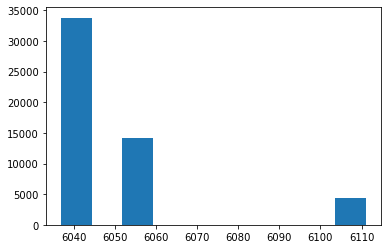

In [26]:
plt.hist(df.fips)

In [27]:
county_dict = {6037.0:'LA County', 6059.0:'Orange County', 6111.0:'Ventura County'}

In [28]:
df['fips'].replace(county_dict, inplace=True)
df.rename(columns={'fips':'county'}, inplace=True)

In [29]:
df.county

0         Orange County
1        Ventura County
2         Orange County
3             LA County
4             LA County
              ...      
52314         LA County
52315         LA County
52316    Ventura County
52317         LA County
52318         LA County
Name: county, Length: 52289, dtype: object

Variance of logerror for LA County.
0.028775868507390202
Variance of logerror for Orange County.
0.038902204197051315
Variance of logerror for Ventura County.
0.024442018103673455


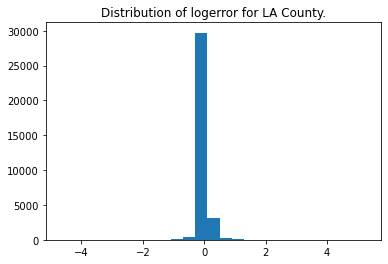

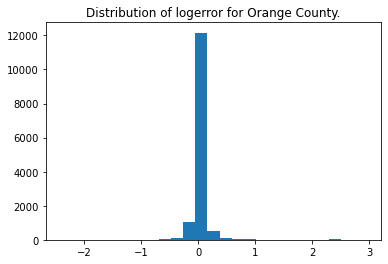

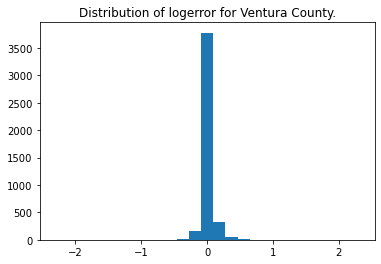

In [30]:
# loop through counties and plot distribution of log error
county_list = ['LA County', 'Orange County', 'Ventura County']

for county in county_list:
    print('Variance of logerror for {}.'.format(county))
    print(df[df['county'] == county].logerror.var())
    
    plt.figure()
    plt.title('Distribution of logerror for {}.'.format(county))
    plt.hist(df[df['county'] == county].logerror, bins = 25)

<AxesSubplot:xlabel='county', ylabel='logerror'>

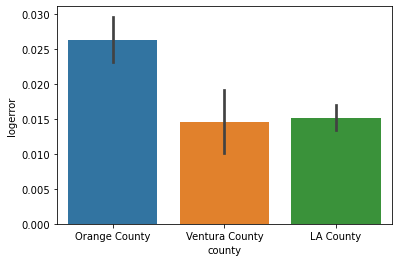

In [31]:
# compare average logerror between counties
sns.barplot(x='county', y='logerror', data=df)

- Null Hypothesis: There is no significant difference between logerror across counties
- Alternative Hypothesis: There is a significant difference between logerror across counties

In [37]:
# conduct an ANOVA test between the counties
f_county, p_county = stats.f_oneway(df[df['county'] == 'LA County'].logerror,
                                    df[df['county'] == 'Orange County'].logerror,
                                    df[df['county'] == 'Ventura County'].logerror)

                                       
f_county, p_county

(20.899115875490956, 8.457758131897342e-10)

Reject the null hypothesis.